# Center of Mass / Centroid distance

Where "in" groeps are 10 AA that are toward the cytplasm side of the protein and "out" groups are 10 amino acids towards the periplasm.

```text
Available static index groups:
Group 0  [TM1_in]
Group 1  [TM1_out]
Group 2  [TM2_in]
Group 3  [TM2_out]
Group 4  [TM5_in]
Group 5  [TM5_out]
Group 6  [TM7_in]
Group 7  [TM7_out]
Group 8  [TM8_in]
Group 9  [TM8_out]
Group 10 [TM11_in]
Group 11 [TM11_out]
```

## 4ZW9 gromacs distance calculations

# Crystal structure comparison

## 5eqi + 4zw9 gromacs distance calculations over time:


In [ ]:
%%bash

# Calc distances:
source /usr/local/gromacs/bin/GMXRC
bash calc_distances.sh

# Plots

## KDE plots 5EQI and 4ZW9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dir_names = "0.1nm 0.05nm 0.01nm".split(" ")
label_names = ["Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

df = pd.DataFrame()
# Per protein:
for protein in ["5eqi", "4zw9"]:
    # Per threshold:
    for i, threshold in enumerate(dir_names):
        # Collect data from all replicates and distances:
        for j, item in enumerate([["TM5_TM11_in", "TM5_TM11_out"], ["TM1_TM7_in", "TM1_TM7_out"], ["TM2_TM8_in", "TM2_TM8_out"]]):
            for rep in [0]:
                path1 = f"distances/{protein}/" + f"{threshold}_{item[0]}_rep{rep+1}.com.xvg"
                path2 = f"distances/{protein}/" + f"{threshold}_{item[1]}_rep{rep+1}.com.xvg"
                if not os.path.isfile(path1):
                    print(f"Not found: {path1}")
                    continue
                if not os.path.isfile(path2):
                    print(f"Not found: {path2}")
                    continue

                res = np.loadtxt(path1, comments=["@", "#"],unpack=True)
                y1 = subset(res[1], 10)
                res = np.loadtxt(path2, comments=["@", "#"],unpack=True)
                y2 = subset(res[1], 10)

                data = {
                        "protein": protein,
                        "item" : item[0] +  "_" + item[1], 
                        "threshold" : threshold,
                        "replicate" : "rep " + str(rep+1),
                        "x" : y1, 
                        "y" : y2, 
                        }
                df = pd.concat([df, pd.DataFrame(data)])

def fix_name(x):
    if x == "5eqi":
        return "GLUT1 "
    if x == "4zw9":
        return "GLUT3"
    return x

df['name'] = df['protein'].apply(fix_name)

In [2]:
df['item'].unique()

array(['TM5_TM11_in_TM5_TM11_out', 'TM1_TM7_in_TM1_TM7_out',
       'TM2_TM8_in_TM2_TM8_out'], dtype=object)

# Only plot replicate 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dir_names = "0.1nm 0.05nm 0.01nm".split(" ")
label_names = ["Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

df = pd.DataFrame()
# Per protein:
for protein in ["5eqi", "4zw9"]:
    # Per threshold:
    for i, threshold in enumerate(dir_names):
        # Collect data from all replicates and distances:
        for j, item in enumerate([["TM2_TM8_in", "TM2_TM8_out"], ["TM1_TM7_in", "TM1_TM7_out"], ["TM5_TM11_in", "TM5_TM11_out"]]):
            path1 = f"distances/{protein}/" + f"{threshold}_{item[0]}_rep1.com.xvg"
            path2 = f"distances/{protein}/" + f"{threshold}_{item[1]}_rep1.com.xvg"
            if not os.path.isfile(path1):
                print(f"Not found: {path1}")
                continue

            res = np.loadtxt(path1, comments=["@", "#"],unpack=True)
            y1 = subset(res[1], 10)
            # y1 = res[1][0:20]
            res = np.loadtxt(path2, comments=["@", "#"],unpack=True)
            # y2 = res[1][0:20]
            y2 = subset(res[1], 10)

            data = {
                    "protein": protein,
                    "item" : item[0] +  "_" + item[1], 
                    "threshold" : threshold,
                    "replicate" : "rep 1",
                    "x" : y1, 
                    "y" : y2, 
                    }
            df = pd.concat([df, pd.DataFrame(data)])

def fix_name(x):
    if x == "5eqi":
        return "GLUT1 "
    if x == "4zw9":
        return "GLUT3"
    return x

df['name'] = df['protein'].apply(fix_name)
df

,protein,item,threshold,replicate,x,y,name
0,5eqi,TM2_TM8_in_TM2_TM8_out,0.1nm,rep 1,2.863,2.386,GLUT1
1,5eqi,TM2_TM8_in_TM2_TM8_out,0.1nm,rep 1,2.980,2.540,GLUT1
2,5eqi,TM2_TM8_in_TM2_TM8_out,0.1nm,rep 1,3.005,2.560,GLUT1
3,5eqi,TM2_TM8_in_TM2_TM8_out,0.1nm,rep 1,2.996,2.512,GLUT1
4,5eqi,TM2_TM8_in_TM2_TM8_out,0.1nm,rep 1,2.895,2.578,GLUT1
...,...,...,...,...,...,...,...
11958,4zw9,TM5_TM11_in_TM5_TM11_out,0.01nm,rep 1,1.570,2.617,GLUT3
11959,4zw9,TM5_TM11_in_TM5_TM11_out,0.01nm,rep 1,1.641,2.591,GLUT3
11960,4zw9,TM5_TM11_in_TM5_TM11_out,0.01nm,rep 1,1.619,2.664,GLUT3
11961,4zw9,TM5_TM11_in_TM5_TM11_out,0.01nm,rep 1,1.556,2.699,GLUT3


In [6]:
intial_df = pd.read_csv("initial_distances.tsv", sep="\t")
intial_df.head()

,protein,description,distance
0,4zw9,cg_crystal_TM1_TM7_in,2.862
1,4zw9,cg_crystal_TM1_TM7_out,2.099
2,4zw9,cg_crystal_TM2_TM8_in,2.871
3,4zw9,cg_crystal_TM2_TM8_out,2.525
4,4zw9,cg_crystal_TM5_TM11_in,1.797


In [7]:
distance = "TM5_TM11"
for symbol, type in zip(["x", "e", "m" ],["cg_crystal", "cg_equil", "cg_minim"]):
    x_blue = intial_df.loc[(intial_df['protein'] == "5eqi") & (intial_df['description'] == f"{type}_{distance}_in")]['distance'].iloc[0]
    y_blue = intial_df.loc[(intial_df['protein'] == "5eqi") & (intial_df['description'] == f"{type}_{distance}_out")]['distance'].iloc[0]
    x_orange = intial_df.loc[(intial_df['protein'] == "4zw9") & (intial_df['description'] == f"{type}_{distance}_in")]['distance'].iloc[0]
    y_orange = intial_df.loc[(intial_df['protein'] == "4zw9") & (intial_df['description'] == f"{type}_{distance}_out")]['distance'].iloc[0]




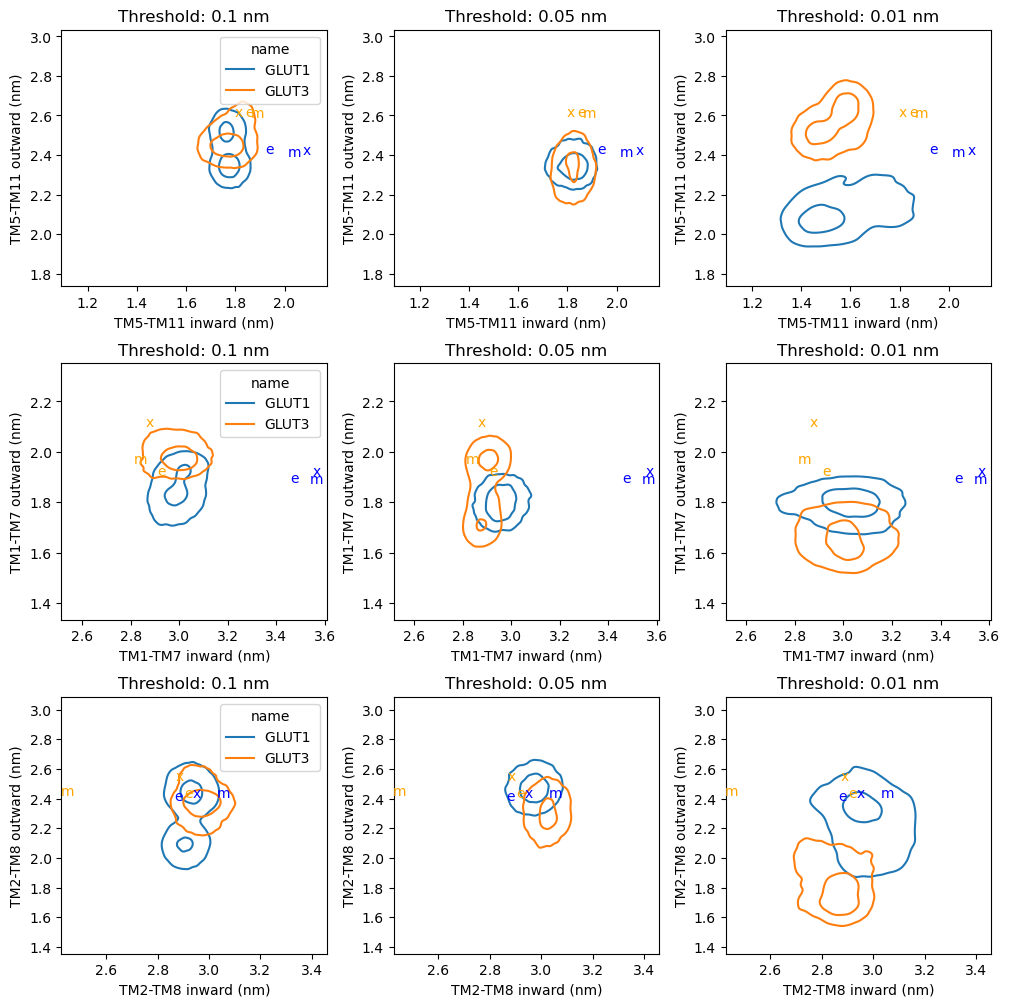

In [25]:
plt.rcParams["figure.figsize"] = (12, 12)
fig, axs = plt.subplots(3, 3)

fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.25)

dir_names = "0.1nm 0.05nm 0.01nm".split(" ")
label_names = ["Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))

for i, threshold in enumerate(dir_names):
    label = names[threshold]
    
    for j, distance in enumerate(["TM5_TM11","TM1_TM7", "TM2_TM8"]):
        helix = df[(df['threshold'] == threshold) & (df['item'] == f"{distance}_in_{distance}_out")]
        sns.kdeplot(data=helix, x="x", y="y", hue="name", ax=axs[j][i], fill=False, legend=(i==0), levels=3)       
        # sns.scatterplot(data=helix, x="x", y="y", hue="name", ax=axs[j][i], legend=(i==0))       
        
        for symbol, type in zip(["x", "e", "m" ],["cg_crystal", "cg_equil", "cg_minim"]):
            x_blue = intial_df.loc[(intial_df['protein'] == "5eqi") & (intial_df['description'] == f"{type}_{distance}_in")]['distance'].iloc[0]
            y_blue = intial_df.loc[(intial_df['protein'] == "5eqi") & (intial_df['description'] == f"{type}_{distance}_out")]['distance'].iloc[0]
            x_orange = intial_df.loc[(intial_df['protein'] == "4zw9") & (intial_df['description'] == f"{type}_{distance}_in")]['distance'].iloc[0]
            y_orange = intial_df.loc[(intial_df['protein'] == "4zw9") & (intial_df['description'] == f"{type}_{distance}_out")]['distance'].iloc[0]
            axs[j][i].text(x=x_blue, y=y_blue, s=symbol, color="blue")
            axs[j][i].text(x=x_orange, y=y_orange, s=symbol, color="orange")

        helix2 = df[(df['item'] == f"{distance}_in_{distance}_out")]
        axs[j][i].set_xlim((min(helix2['x'])-0.15, max(helix2['x'])+0.15))
        axs[j][i].set_ylim((min(helix2['y'])-0.15, max(helix2['y'])+0.15))

            
        axs[j][i].set_title(label)
        axs[j][i].set_xlabel(f"{distance.replace("_","-")} inward (nm)")
        axs[j][i].set_ylabel(f"{distance.replace("_","-")} outward (nm)")



In [24]:
distance = "TM2_TM8"
helix = df[(df['threshold'] == "0.1nm") & (df['item'] == "TM2_TM8_in_TM2_TM8_out")]
# sns.scatterplot(data=helix, x="x", y="y")
helix['item'].unique()

array(['TM2_TM8_in_TM2_TM8_out'], dtype=object)